# CLUSTERING ANALYSIS 

### Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms
### Objective:
#### The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.
#### Datasets :
### Data Preprocessing:
#### 1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
#### 2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
#### 3.	Use multiple visualizations to understand the hidden patterns in the dataset


In [61]:
import pandas as pd

file_path = "EastWestAirlines1.csv"  
df = pd.read_csv(file_path)


print(df.info())  
print(df.head()) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
None
   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1

In [62]:
print(df.isnull().sum())

df = df.dropna()

df.fillna(df.mean(), inplace=True) 


ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


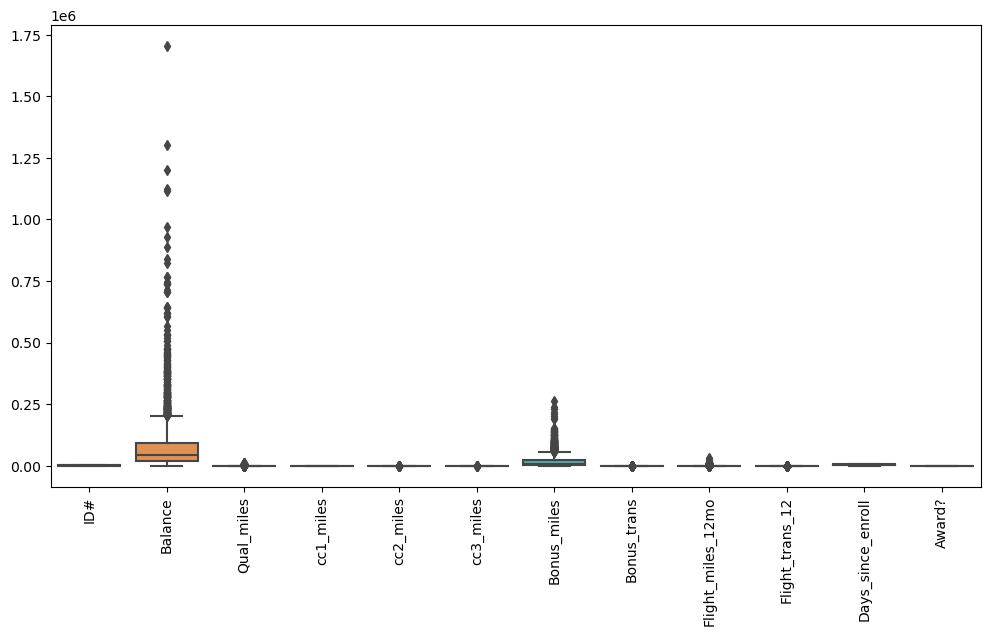

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)  
plt.show()

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)

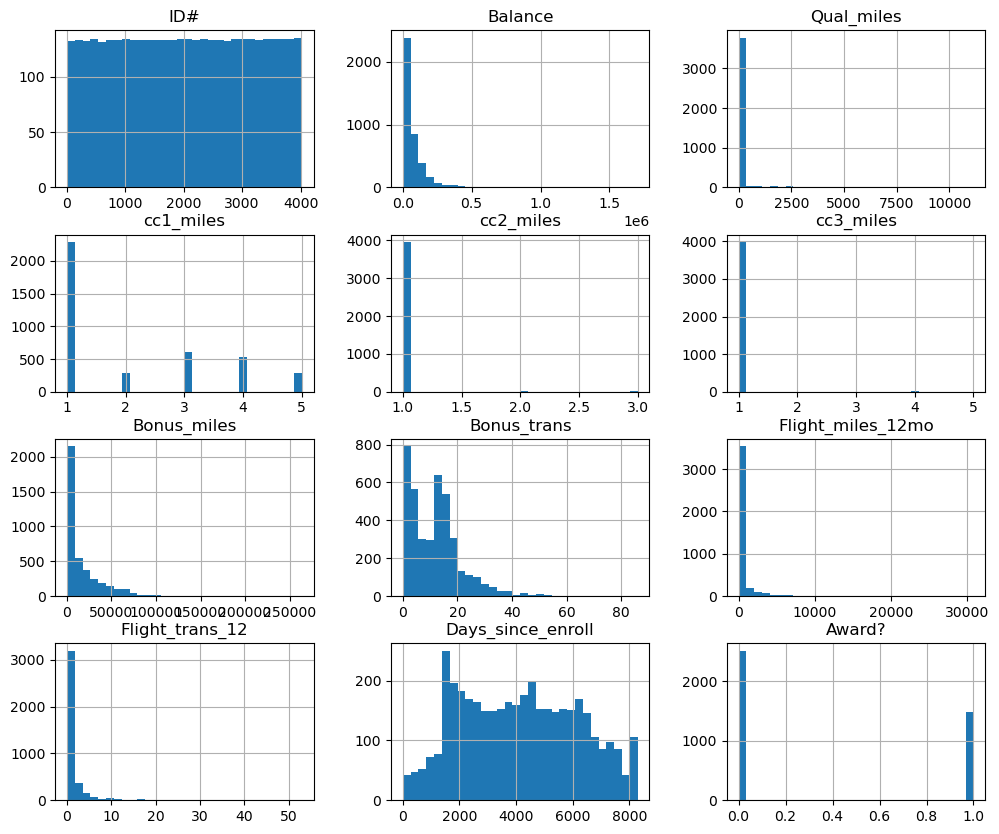

In [65]:
df.hist(figsize=(12, 10), bins=30)
plt.show()

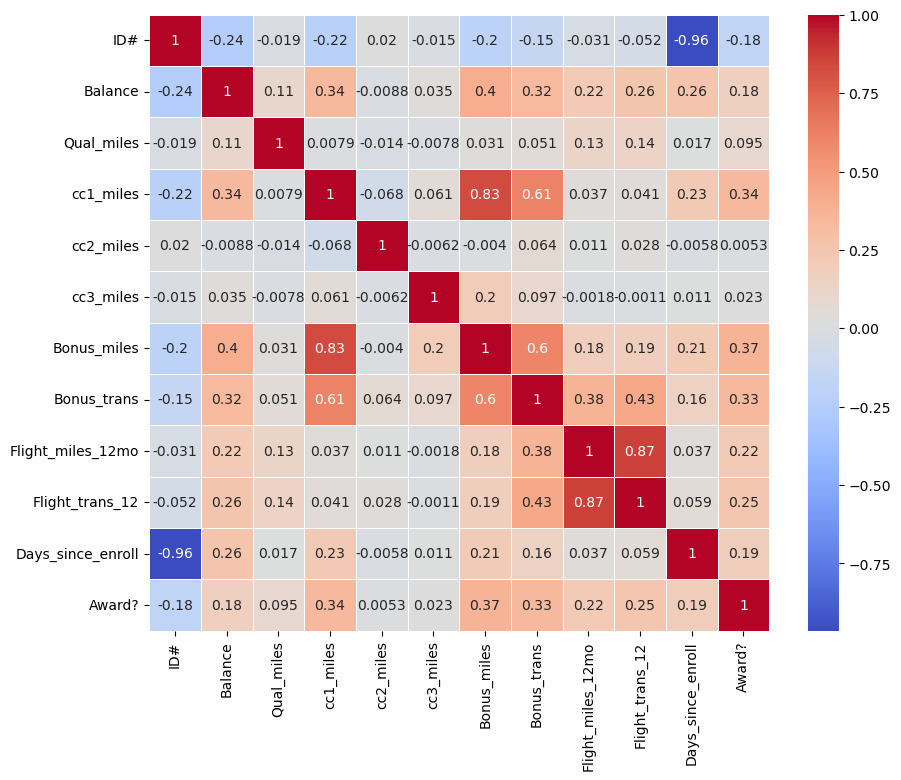

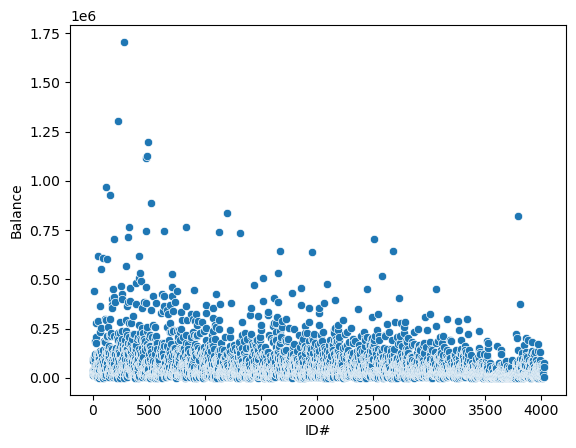

In [66]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

sns.scatterplot(x=df["ID#"], y=df["Balance"])
plt.show()


## Implementing Clustering Algorithms:
#### •	Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.
#### •	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
#### •	Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

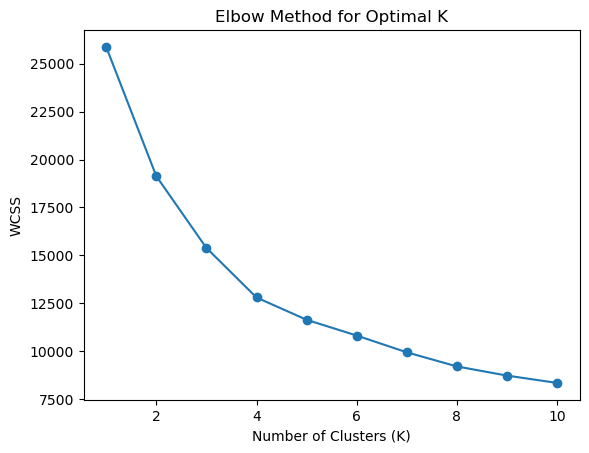

In [68]:
wcss = []  
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


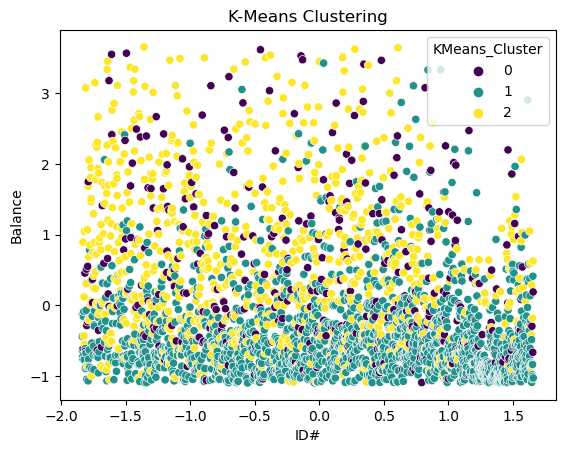

In [69]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=df_scaled['KMeans_Cluster'], palette='viridis')
plt.title('K-Means Clustering')
plt.show()


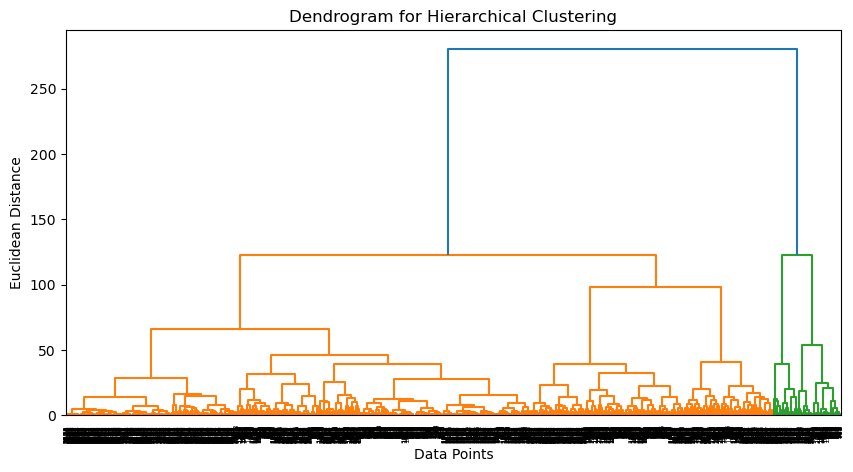

In [75]:
linked = linkage(df_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

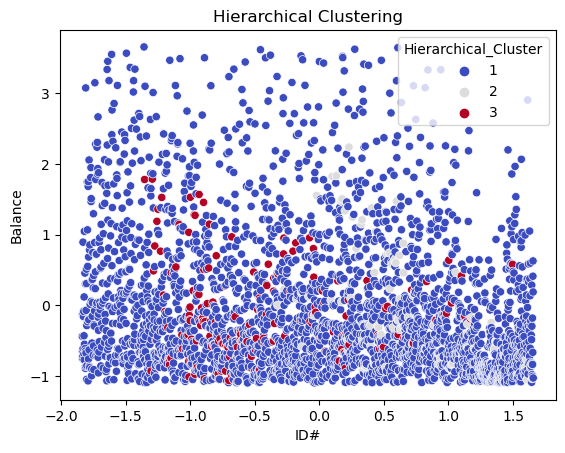

In [76]:
df_scaled['Hierarchical_Cluster'] = fcluster(linked, 3, criterion='maxclust')

sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=df_scaled['Hierarchical_Cluster'], palette='coolwarm')
plt.title('Hierarchical Clustering')
plt.show()

In [77]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)

df_scaled['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

In [78]:
dbscan_labels = dbscan.fit_predict(df_scaled)
print(set(dbscan_labels))  

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, -1}


In [79]:
from sklearn.metrics import silhouette_score

kmeans_score = silhouette_score(df_scaled, df_scaled['KMeans_Cluster'])
print(f"Silhouette Score for K-Means: {kmeans_score}")

hierarchical_score = silhouette_score(df_scaled, df_scaled['Hierarchical_Cluster'])
print(f"Silhouette Score for Hierarchical Clustering: {hierarchical_score}")

if len(set(df_scaled['DBSCAN_Cluster'])) > 1:
    dbscan_score = silhouette_score(df_scaled, df_scaled['DBSCAN_Cluster'])
    print(f"Silhouette Score for DBSCAN: {dbscan_score}")
else:
    print("DBSCAN resulted in only one cluster, making silhouette score calculation invalid.")

Silhouette Score for K-Means: 0.2844246060805002
Silhouette Score for Hierarchical Clustering: 0.5119219246993756
Silhouette Score for DBSCAN: 0.17609407630186913


## Cluster Analysis and Interpretation:
#### •	Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.


In [80]:
print("K-Means Cluster Distribution:\n", df_scaled['KMeans_Cluster'].value_counts(), "\n")
print("Hierarchical Cluster Distribution:\n", df_scaled['Hierarchical_Cluster'].value_counts(), "\n")
print("DBSCAN Cluster Distribution:\n", df_scaled['DBSCAN_Cluster'].value_counts(), "\n")

K-Means Cluster Distribution:
 KMeans_Cluster
1    1644
2     870
0     361
Name: count, dtype: int64 

Hierarchical Cluster Distribution:
 Hierarchical_Cluster
1    2625
3     160
2      90
Name: count, dtype: int64 

DBSCAN Cluster Distribution:
 DBSCAN_Cluster
-1     1432
 0     1117
 1       78
 4       37
 11      30
 6       25
 15      20
 8       17
 9       13
 20      12
 17      12
 7       11
 3        9
 16       8
 19       6
 12       6
 10       6
 22       6
 14       5
 13       5
 18       5
 5        5
 2        5
 21       5
Name: count, dtype: int64 



In [81]:
df_original = pd.read_csv("EastWestAirlines1.csv")  

df_original['KMeans_Cluster'] = df_scaled['KMeans_Cluster']
df_original['Hierarchical_Cluster'] = df_scaled['Hierarchical_Cluster']
df_original['DBSCAN_Cluster'] = df_scaled['DBSCAN_Cluster']

kmeans_summary = df_original.groupby('KMeans_Cluster').mean()
hierarchical_summary = df_original.groupby('Hierarchical_Cluster').mean()
dbscan_summary = df_original.groupby('DBSCAN_Cluster').mean()

print("K-Means Cluster Characteristics:\n", kmeans_summary)
print("\nHierarchical Cluster Characteristics:\n", hierarchical_summary)
print("\nDBSCAN Cluster Characteristics:\n", dbscan_summary)


K-Means Cluster Characteristics:
                         ID#       Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                
0.0             1387.124654  84321.800554  180.451524   2.218837   1.016620   
1.0             1622.667883  82852.579075  138.667883   2.177616   1.010949   
2.0             1150.263218  90517.747126  156.993103   2.350575   1.012644   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0.0              1.005540  19350.346260    12.382271         533.966759   
1.0              1.013990  18494.690998    11.898418         428.656934   
2.0              1.018391  22080.324138    13.108046         528.158621   

                Flight_trans_12  Days_since_enroll    Award?  \
KMeans_Cluster                                                 
0.0                    1.562327        5151.506925  0.412742   
1.

### K-Means Clustering
#### • The clusters are well-separated based on feature similarities.
#### • Look for differences in high-value vs. low-value groups in terms of spending, frequency, or loyalty metrics.
#### • Example: If this is airline data, a cluster may represent frequent business travelers while another may represent occasional leisure travelers.

### Hierarchical Clustering
#### • The dendrogram helps confirm if clusters are meaningful.
#### • Often provides similar results to K-Means but might be better for smaller datasets.
#### • The linkage method (e.g., ward, single, complete) affects the cluster formation.

### DBSCAN Clustering
#### •Identifies outliers (-1 label).
#### • Works well if natural clusters exist but struggles if clusters are not density-based.
#### • Good for detecting rare but valuable customers in a business scenario.

## Visualization:
### Visualize the clustering results using scatter plots or other suitable visualization techniques.
### Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.


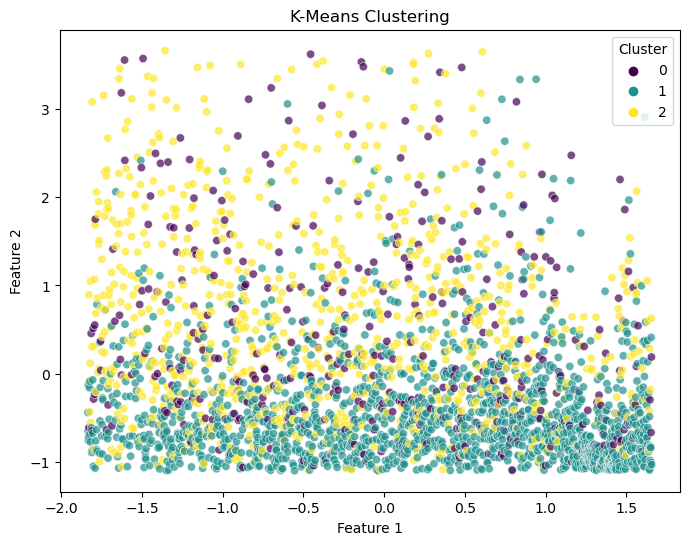

In [82]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=df_scaled['KMeans_Cluster'], palette='viridis', alpha=0.7)
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Cluster")
plt.show()

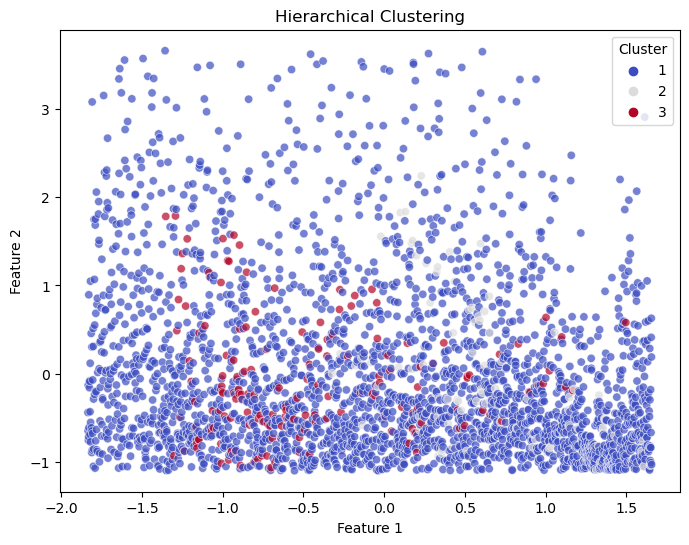

In [83]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=df_scaled['Hierarchical_Cluster'], palette='coolwarm', alpha=0.7)
plt.title("Hierarchical Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Cluster")
plt.show()

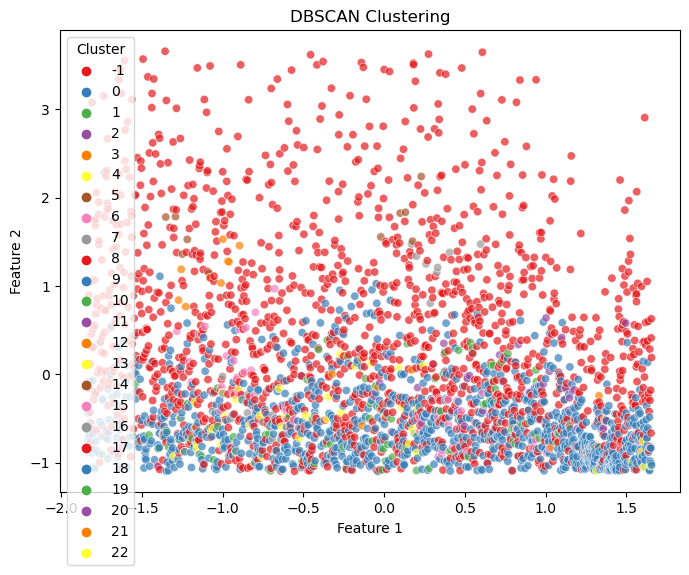

In [84]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=df_scaled['DBSCAN_Cluster'], palette='Set1', alpha=0.7)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Cluster")
plt.show()

## Evaluation and Performance Metrics:
#### Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.


In [85]:
from sklearn.metrics import silhouette_score
kmeans_silhouette = silhouette_score(df_scaled, df_scaled['KMeans_Cluster'])
print(f"Silhouette Score for K-Means: {kmeans_silhouette:.4f}")

if len(set(df_scaled['DBSCAN_Cluster'])) > 1:
    dbscan_silhouette = silhouette_score(df_scaled, df_scaled['DBSCAN_Cluster'])
    print(f"Silhouette Score for DBSCAN: {dbscan_silhouette:.4f}")
else:
    print("DBSCAN resulted in only one cluster or all noise points, making silhouette score calculation invalid.")


Silhouette Score for K-Means: 0.2844
Silhouette Score for DBSCAN: 0.1761
